## Libraries

Let's get started by importing some libraries:

- `numpy` for numerical operations
- `palmerpenguins` for the dataset
- [matplotlib](https://python-graph-gallery.com/matplotlib/) for the visualization
- `ptitprince` for the rainplot


In [13]:
# For the data
import palmerpenguins
import matplotlib.pyplot as plt
import numpy as np
import ptitprince as pt

## Dataset

Today we're gonna use the popular Palmer Penguins dataset which we have used in [other](https://www.python-graph-gallery.com/web-text-repel-with-matplotlib) [posts](https://www.python-graph-gallery.com/custom-legend-with-matplotlib) too.

In [14]:
penguins = palmerpenguins.load_penguins().dropna()

## Basic half-violin plot

The **PtitPrince** library makes it very easy to obtain [half-violin](https://python-graph-gallery.com/violin-plot/) plots with the function `half_violinplot()`. We can use a **pandas dataframe** and the names of the variables for each axis, or simply the array of values. 

Obtaining a horizontal [half-violin](https://python-graph-gallery.com/violin-plot/) plot is as simple as passing the name of the numerical variable to `x` and the name of the categorical variable to `y`.

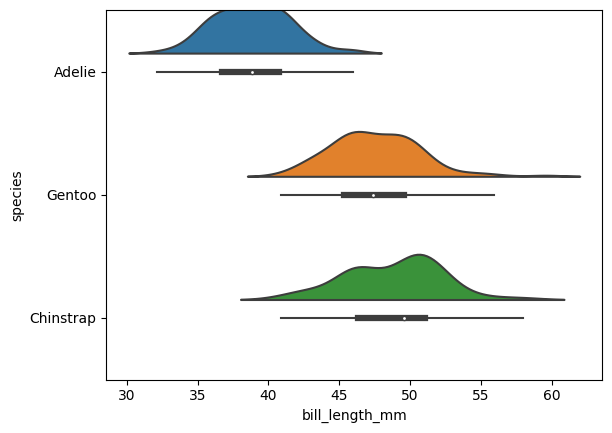

In [15]:
pt.half_violinplot(x="bill_length_mm", y="species", data=penguins);

If you change the order of the variables you obtain the vertical version of the same plot:

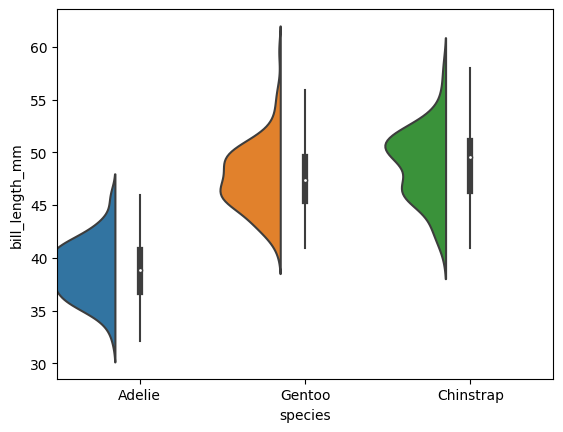

In [16]:
pt.half_violinplot(x="species", y="bill_length_mm", data=penguins);

## Getting started with out rainplot

One of the first things we do is defining creating lists to store the **names of the species and the colors**. The first is going to be used to subset the dataframe, and colors ara matter of good-taste. A nice-looking palette of colors can make a simple plot much more attractive.

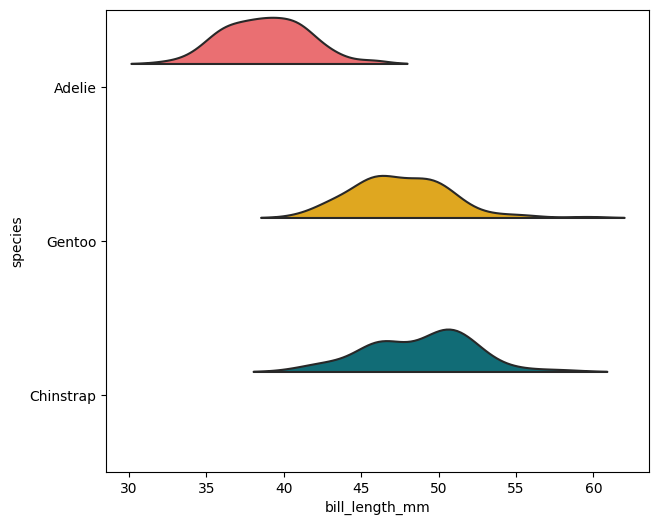

In [17]:
SPECIES = ["Adelie", "Gentoo", "Chinstrap"]
COLORS = ["#FF5A5F", "#FFB400", "#007A87"]

# Create our own Axes with custom size
fig, ax = plt.subplots(figsize=(7, 6))

# inner=None removes the default boxplot
# The 'width' argument allows us to scale the density
# We pass our color palette in the 'palette' argument

pt.half_violinplot(
    x="bill_length_mm", y="species", palette=COLORS, 
    inner=None, data=penguins, width=0.6, ax=ax
);

## Add rain

The rain, which is just another name for the mono-dimensional representation of the data points, is useful to **identify potential outliers** or other patterns. These points are **jittered** to reduce the overlap and obtain a clearer view of their distribution.

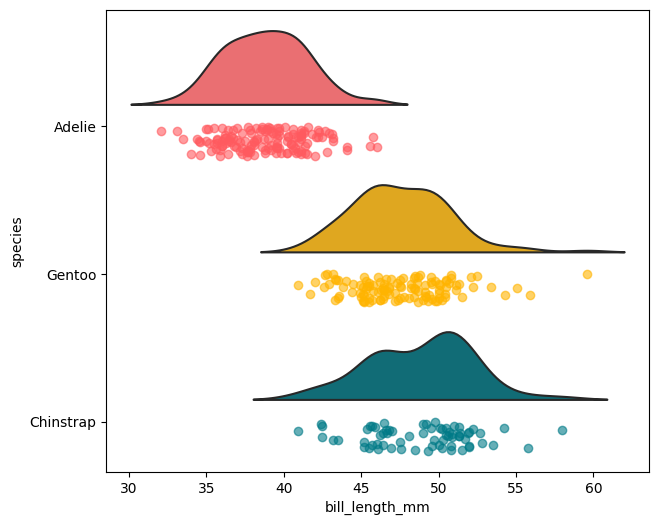

In [18]:
fig, ax = plt.subplots(figsize=(7, 6))

# Half-violin plot as above
pt.half_violinplot(
    x="bill_length_mm", y="species", palette=COLORS, 
    inner=None, data=penguins, width=1, ax=ax
)

# Iterate over the species
for i, species in enumerate(SPECIES):
    # Subset the data
    data = penguins[penguins["species"] == species]
    
    # Jitter the values on the vertical axis
    y = i + np.random.uniform(high=0.2, size=len(data))
    
    # Select the values of the horizontal axis
    x = data["bill_length_mm"]
    
    # Add the rain using the scatter method.
    ax.scatter(x, y, color=COLORS[i], alpha=0.6)

## Add boxplots

The last step of this process is to add a [boxplot](https://python-graph-gallery.com/boxplot) **on top of the dots**. This is helpful to quickly **visualize the median** and obtain clear bounds for the bulk of the distributions.

The boxplots are added with the `.boxplot()` method. This method expects to receive a list of arrays with the values for each group. If you're not very familiar with boxplots in Matplotlib [this](https://www.python-graph-gallery.com/web-ggbetweenstats-with-matplotlib) is going to be very helpful.

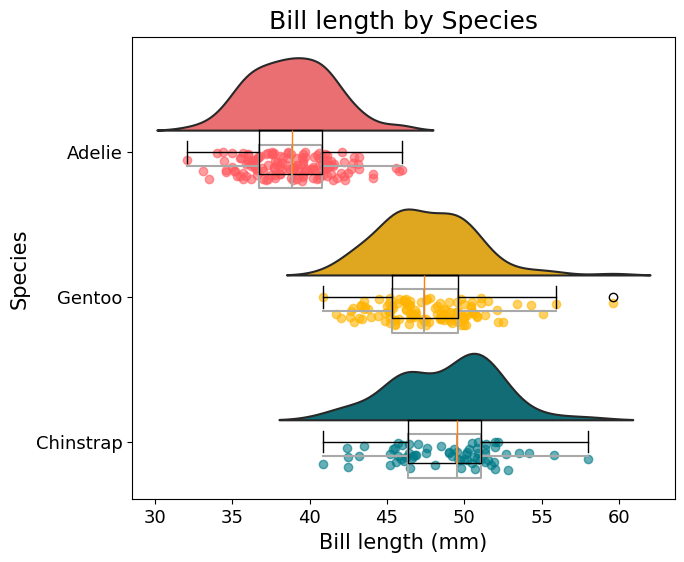

In [22]:
# Generate list of arrays
boxplot_data = [
    penguins[penguins["species"] == species]["bill_length_mm"].values 
    for species in SPECIES
]

# Vertical positions for the boxplots
POSITIONS = [0, 1, 2]

ax.boxplot(boxplot_data, vert=False, positions=POSITIONS, manage_ticks=False)

fig

## Customize the raincloud plot

One problem with the [boxplots](https://python-graph-gallery.com/boxplot/) above is that they are not aligned with the rain below. This last step consists of **shifting the boxplots** a little and customizing their appearance.

The following are two dictionaries with **styles for the line** representing the mean and the box.

In [20]:
# The style of the line that represents the median.
medianprops = {"linewidth": 1.5, "color": "#a9a9a9", "solid_capstyle": "butt"}
# The style of the box ... This is also used for the whiskers
boxprops = {"linewidth": 1.5, "color": "#a9a9a9"}

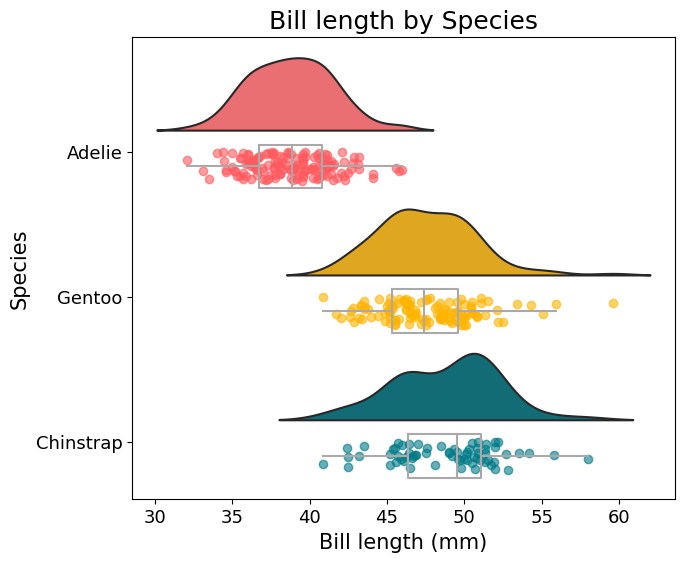

In [21]:
fig, ax = plt.subplots(figsize=(7, 6))

pt.half_violinplot(
    x="bill_length_mm", y="species", scale = "area", 
    palette=COLORS, inner=None, data=penguins, width=1,
    ax=ax
)

for i, species in enumerate(SPECIES):
    data = penguins[penguins["species"] == species]
    y = i + np.random.uniform(high=0.2, size=len(data))
    x = data["bill_length_mm"]
    ax.scatter(x, y, color=COLORS[i], alpha=0.6)

# Positions are shifted now
SHIFT = 0.1
POSITIONS = [0 + SHIFT, 1 + SHIFT, 2 + SHIFT]

ax.boxplot(
    boxplot_data, 
    vert=False, 
    positions=POSITIONS, 
    manage_ticks=False,
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Finally, add labels and a title
ax.set_xlabel("Bill length (mm)", fontsize=15)
ax.set_ylabel("Species", fontsize=15)
ax.set_title("Bill length by Species", fontsize=18)

# Change size of tick labels
ax.tick_params(labelsize=13)

## Going further

In this post we've seen how to combine a [density plot](https://python-graph-gallery.com/density-plot/) and a [boxplot](https://python-graph-gallery.com/boxplot/) to create a **raincloud plot**. This is a very powerful way to visualize the distribution of a variable across different groups.

You might be interested how to create **multiple density plots**, also called [ridgeline plot](https://python-graph-gallery.com/ridgeline/)